<h1 style= 'text-align:center;'> Weeks 9 & 10 Exercise - TSA Complaints</h1>

<p style= 'text-align: center;'> Bernard Owusu Sefah</p>

<p style= 'text-align: center;'> Data Presentation & Visualization</p>

<p style= 'text-align: center;'> DSC 640</p>



#### Audience, Purpose, and Medium

1. Audience:
The audience for this analysis includes technical stakeholders such as TSA employees, operational managers, and policy-makers. They have a familiarity with airport operations, complaints data, and may be interested in identifying patterns to improve processes.
This audience possesses a higher level of data literacy, which allows for more detailed visualizations, such as heat maps and geographic distributions.

2. Purpose:
The purpose of this data story is to identify key problem areas in TSA operations across different airports and complaint categories. By presenting this information clearly, the goal is to drive improvements in passenger experiences.
Call to Action: Encourage stakeholders to allocate resources more efficiently, prioritize addressing common complaints at high-traffic airports, and potentially improve the expedited screening program based on the data insights.

3. Medium:
The analysis is presented using a combination of powerpoint and Python in a Jupyter Notebook. This format allows for interactive exploration of data, integration of visualizations, and the ability to perform in-depth analysis with supporting code.
This medium is particularly suited for a technical audience that may wish to drill down into specific data aspects during or after the presentation.

In [1]:
import pandas as pd

# Load the datasets
complaints_by_subcategory = pd.read_csv("complaints-by-subcategory.csv")
iata_icao = pd.read_csv("iata-icao.csv")
complaints_by_category = pd.read_csv("complaints-by-category.csv")
complaints_by_airport = pd.read_csv("complaints-by-airport.csv")

# Display the first few rows of each dataset to understand their structure
complaints_by_subcategory_head = complaints_by_subcategory.head()
iata_icao_head = iata_icao.head()
complaints_by_category_head = complaints_by_category.head()
complaints_by_airport_head = complaints_by_airport.head()

(complaints_by_subcategory_head, iata_icao_head, complaints_by_category_head, complaints_by_airport_head)


(  pdf_report_date airport                           category  \
 0         2019-02     ABE         Hazardous Materials Safety   
 1         2019-02     ABE  Mishandling of Passenger Property   
 2         2019-02     ABE         Hazardous Materials Safety   
 3         2019-02     ABE  Mishandling of Passenger Property   
 4         2019-02     ABE         Hazardous Materials Safety   
 
                               subcategory year_month  count  \
 0                                 General    2015-01      0   
 1  Damaged/Missing Items--Checked Baggage    2015-01      0   
 2                                 General    2015-02      0   
 3  Damaged/Missing Items--Checked Baggage    2015-02      0   
 4                                 General    2015-03      0   
 
                            clean_cat                             clean_subcat  \
 0         Hazardous Materials Safety                                  General   
 1  Mishandling of Passenger Property  *Damaged/Missing It

The datasets provide the following information:

1. Complaints by Subcategory: Includes complaint details by airport, category, subcategory, year-month, and counts. It also has cleaned category and subcategory names.

2. IATA/ICAO: Contains airport codes, names, regions, country codes, and geographical coordinates (latitude and longitude).

3. Complaints by Category: Similar to the subcategory dataset but focuses on broader categories of complaints.

4. Complaints by Airport: Aggregates total complaint counts per airport over specific months.

Next Steps:
Data Analysis: I'll begin by exploring key metrics and patterns, such as identifying the most common complaints, locations with the highest incidents, and trends over time.

In [2]:
# Summarize the total complaints by category, airport, and time to identify key patterns

# Top categories by total complaints
total_complaints_by_category = complaints_by_category.groupby('clean_cat')['count'].sum().sort_values(ascending=False)

# Top airports by total complaints
total_complaints_by_airport = complaints_by_airport.groupby('airport')['count'].sum().sort_values(ascending=False)

# Trend of complaints over time
complaints_trend_over_time = complaints_by_category.groupby('year_month')['count'].sum().reset_index()

# Display the summary data
(total_complaints_by_category.head(10), total_complaints_by_airport.head(10), complaints_trend_over_time.head())


(clean_cat
 Expedited Passenger Screening Program    569943
 Mishandling of Passenger Property        128271
 Customer Service                          82168
 Screening                                 64939
 Property - Special Handling               46610
 Locks                                     21889
 Persons w/ Disabilities (PWD)             17216
 Patdown                                   16554
 Civil Rights                              14077
 Airline                                   11537
 Name: count, dtype: int64,
 airport
 LAX    24794
 JFK    24677
 EWR    24405
 ATL    23591
 MCO    22308
 DEN    19015
 ORD    18256
 DFW    15954
 LAS    15937
 MIA    14907
 Name: count, dtype: int64,
   year_month  count
 0    2015-01   7610
 1    2015-02   5916
 2    2015-03   6988
 3    2015-04   6891
 4    2015-05   6730)

##### Initial Findings

1. Top Complaint Categories:
* The most frequent complaint category is the "Expedited Passenger Screening Program," accounting for over half a million incidents.
* Other significant issues include "Mishandling of Passenger Property," "Customer Service," and "Screening."

2. Top Airports by Complaints:
* The highest number of complaints were recorded at major airports such as Los Angeles (LAX), John F. Kennedy (JFK), and Newark (EWR).
* Other airports like Atlanta (ATL), Orlando (MCO), and Denver (DEN) also featured prominently.

3. Trend Over Time:
* Monthly complaint counts show fluctuations, suggesting possible seasonality or events affecting traveler experiences at certain times of the year.

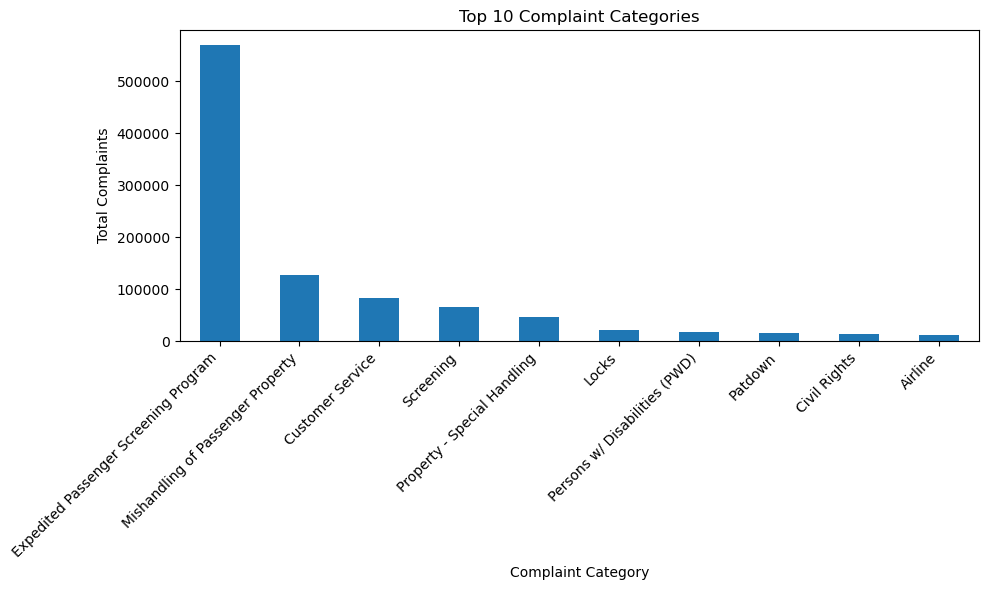

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart for the top complaint categories
plt.figure(figsize=(10, 6))
total_complaints_by_category.head(10).plot(kind='bar')
plt.title('Top 10 Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Analysis
Top 10 Complaint Categories:

* "Expedited Passenger Screening Program" dominates, indicating possible issues with the efficiency or process of screening.
* Other frequent complaints relate to property mishandling, customer service, and screening practices.

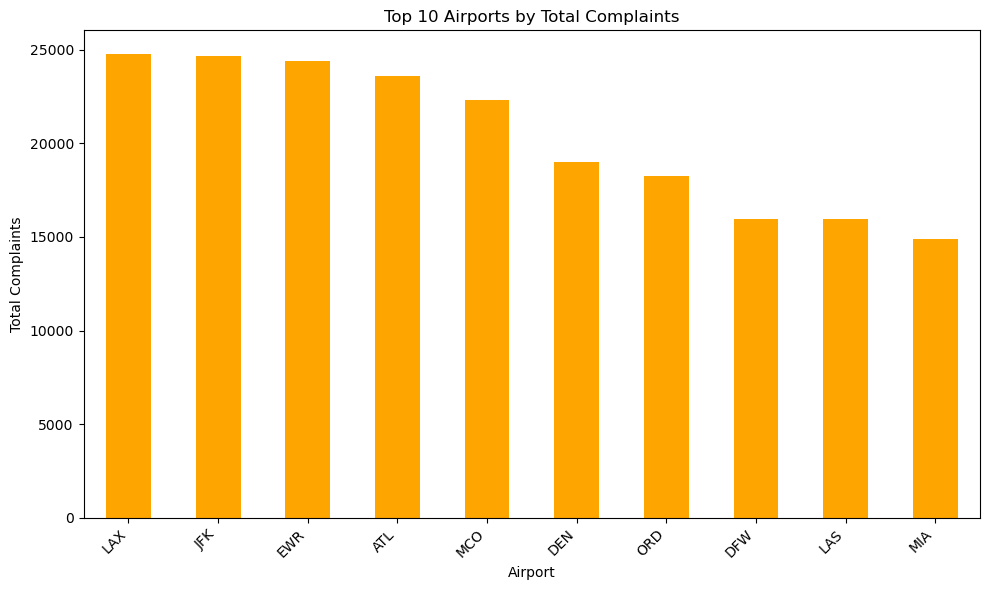

In [5]:
# Create a bar chart for the top airports by complaints
plt.figure(figsize=(10, 6))
total_complaints_by_airport.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Airports by Total Complaints')
plt.xlabel('Airport')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Analysis
Top 10 Airports by Complaints:

* High-traffic airports like LAX, JFK, and EWR have the most complaints, suggesting that volume may be a contributing factor.
* The prevalence of complaints at these airports may point to areas needing process improvements or better resource allocation.

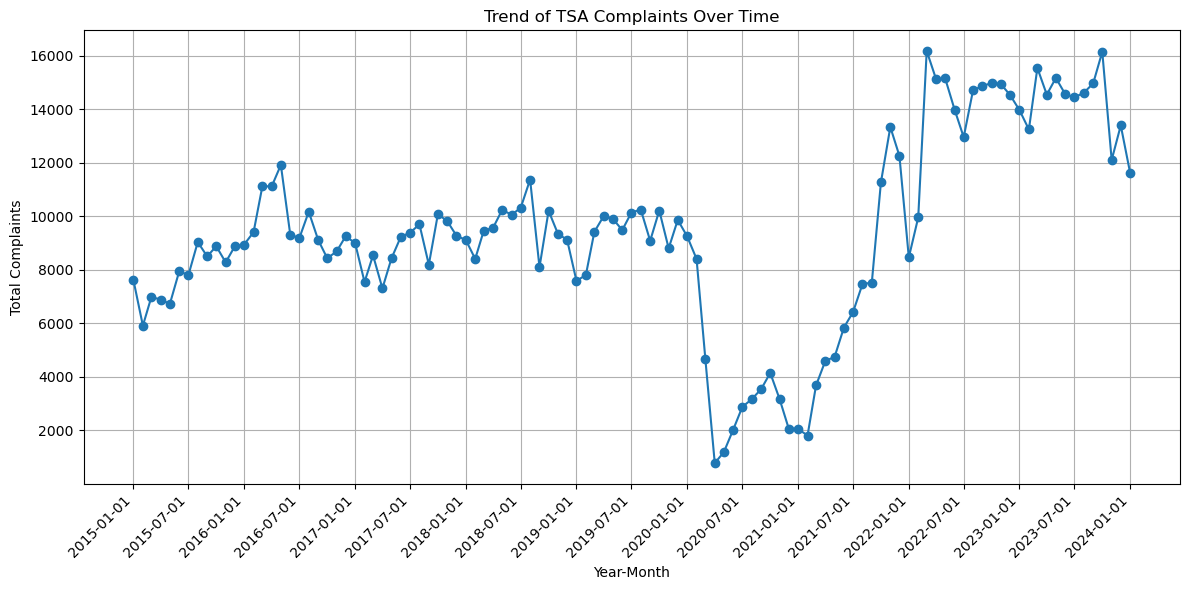

In [11]:
complaints_trend_over_time['year_month'] = pd.to_datetime(complaints_trend_over_time['year_month'])
complaints_trend_over_time = complaints_trend_over_time.sort_values(by='year_month')

plt.figure(figsize=(12, 6))
plt.plot(complaints_trend_over_time['year_month'], complaints_trend_over_time['count'], marker='o')
plt.title('Trend of TSA Complaints Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Complaints')
plt.xticks(complaints_trend_over_time['year_month'][::6], rotation=45, ha='right')  # Adjusts x-axis to show every 6th month
plt.grid(True)
plt.tight_layout()
plt.show()


##### Analysis 
Trend of TSA Complaints Over Time:

Complaint counts show variations across months, hinting at patterns that may be tied to travel peaks (e.g., holidays, summer vacations).

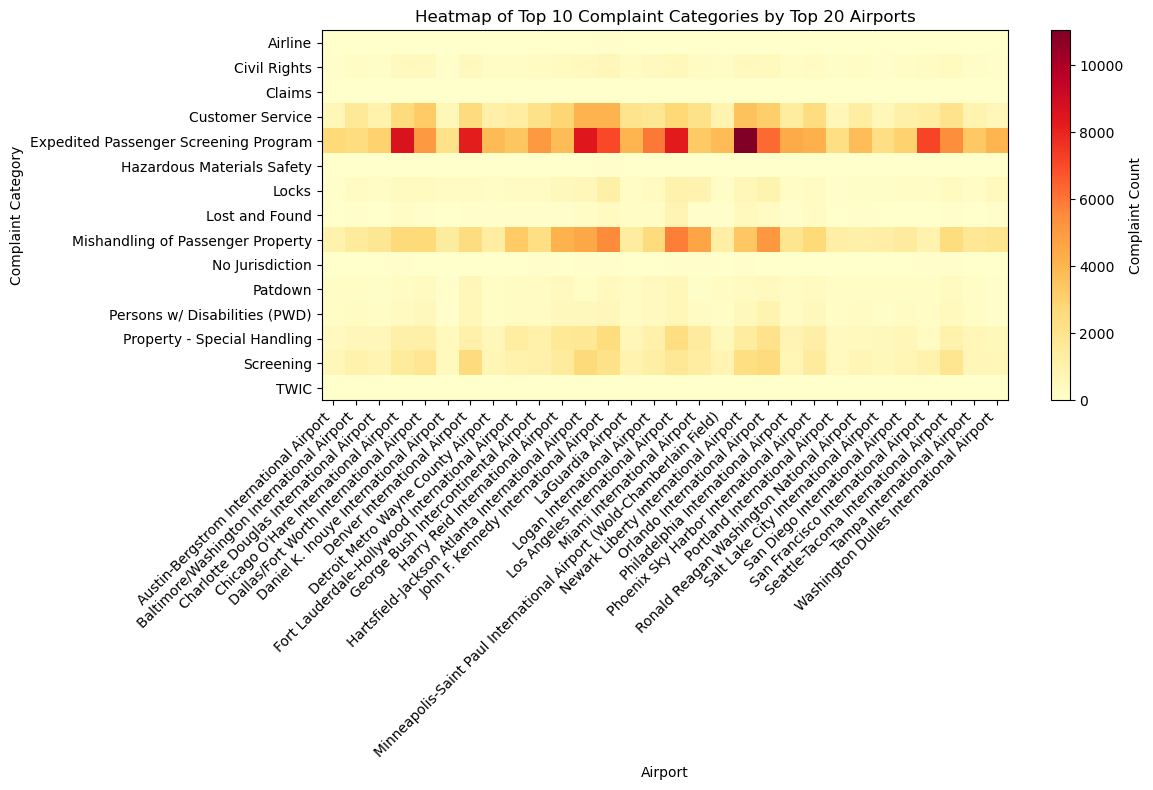

In [21]:
# Adjust airport filtering to use full airport names from `airport_y`
top_airport_names = merged_complaints[merged_complaints['airport_x'].isin(top_airports)]['airport_y'].unique()

# Re-apply the filtering with full airport names
filtered_complaints = merged_complaints[
    merged_complaints['clean_cat'].isin(top_categories) &
    merged_complaints['airport_y'].isin(top_airport_names)
]

# Re-create the pivot table for the heatmap
heatmap_data_filtered = filtered_complaints.pivot_table(index='clean_cat', columns='airport_y', values='count', aggfunc='sum').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data_filtered, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Complaint Count')
plt.title('Heatmap of Top 10 Complaint Categories by Top 20 Airports')
plt.xlabel('Airport')
plt.ylabel('Complaint Category')
plt.xticks(range(len(heatmap_data_filtered.columns)), heatmap_data_filtered.columns, rotation=45, ha='right')
plt.yticks(range(len(heatmap_data_filtered.index)), heatmap_data_filtered.index)
plt.tight_layout()
plt.show()

##### Analysis
The heatmap illustrates the distribution of complaints across different categories and airports. It visually highlights which complaint types are prevalent at specific locations, making it easier to identify potential problem areas.

* Operational Focus: The heatmap highlights areas where TSA might focus resources, especially on improving the passenger screening experience and handling property complaints at major hubs.

* Resource Allocation: Given the high volume of complaints in specific categories, the TSA could consider prioritizing customer service initiatives at busy airports to reduce these pain points.

* Targeted Improvements: By addressing the most common issues at the busiest airports, TSA can enhance overall passenger satisfaction and reduce complaint volumes in high-impact areas.


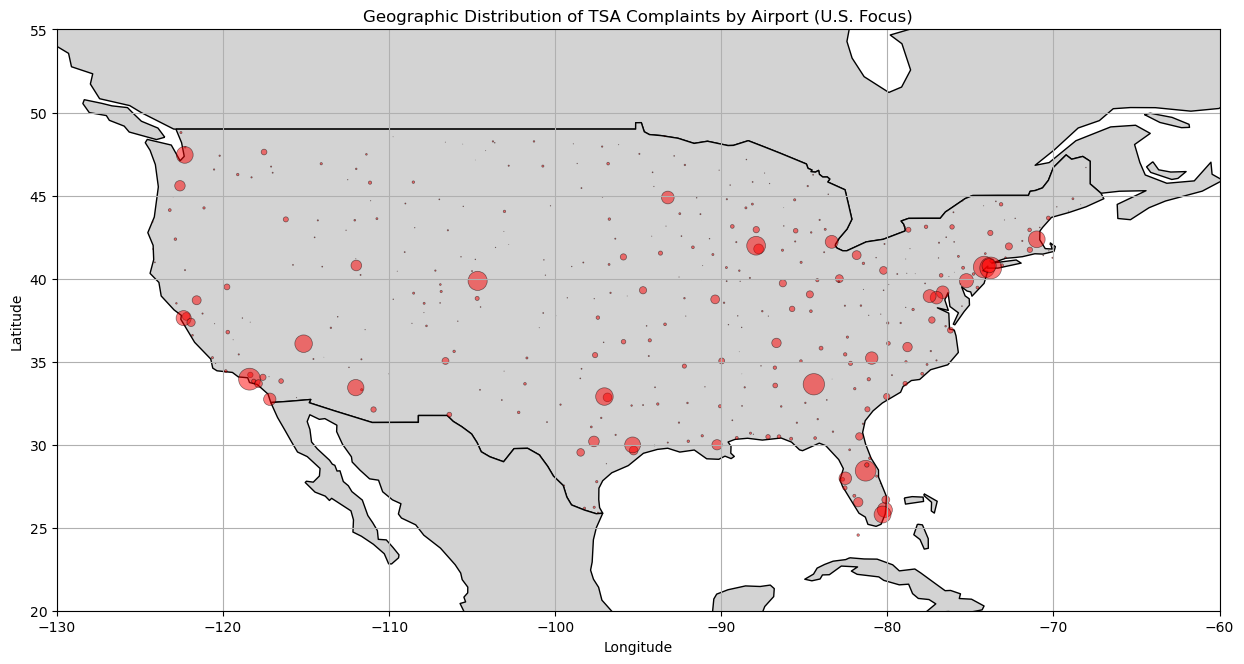

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map shapefile (assuming it's already downloaded)
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Step 1: Aggregate complaint data by airport
iata_agg = complaints_by_airport.groupby('airport').sum().reset_index()
airport_geo = pd.merge(iata_icao, iata_agg, left_on='iata', right_on='airport', how='inner')

# Step 2: Convert to GeoDataFrame for geographic plotting
gdf = gpd.GeoDataFrame(airport_geo, geometry=gpd.points_from_xy(airport_geo.longitude, airport_geo.latitude))

# Step 3: Plot the map with a zoomed-in focus on the U.S.
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot airports with complaints, using red for markers and sizing based on complaint count
gdf.plot(ax=ax, color="red", markersize=gdf['count'] / 100, alpha=0.5, edgecolor="k", linewidth=0.5)

# Set the x and y limits to focus on the U.S.
ax.set_xlim(-130, -60)  # Longitude range for the U.S.
ax.set_ylim(20, 55)     # Latitude range for the U.S.

# Add labels and title
plt.title("Geographic Distribution of TSA Complaints by Airport (U.S. Focus)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()


##### Analysis 
Geographic Distribution of TSA Complaints by Airport (US Focused) 

1. Complaint Volume by Airport:
Each red circle represents an airport, with the size of the circle proportional to the volume of complaints reported.
Larger circles indicate higher complaint volumes. For example, airports in cities like Los Angeles, New York, and Atlanta have noticeably larger circles, reflecting their high passenger traffic and complex operations.

2. Geographic Spread:
Complaints are widespread across the U.S., covering airports in all regions. However, larger markers are clustered around major metropolitan areas, indicating that busier airports experience higher complaint counts.
Airports along the East Coast, West Coast, and in central transportation hubs like Chicago show more frequent complaints.

3. Operational Focus:
This visualization suggests that TSA and airport operations teams might prioritize resources and process improvements at these high-complaint airports, particularly those with larger markers.
This can help identify potential problem areas and allows for targeted interventions in regions with higher passenger volumes.

The map offers a clear visual summary of where TSA complaints are concentrated across the U.S., with larger airports in highly populated areas experiencing more complaints. This data-driven view can assist TSA in focusing efforts on airports with the highest need for improvement, potentially reducing complaints and improving passenger experiences in high-traffic regions.

#### Design Considerations

1. Color:
Red tones were used in geographic visualizations to highlight areas of concern, drawing immediate attention to problem hotspots.
Consistent color schemes across charts help in visually linking related data points (e.g., complaints).

2. Text & Alignment:
Clear titles, labels, and concise descriptions were used to ensure readability. Technical terminology was included, assuming the audience's familiarity.
Alignment and spacing were carefully chosen to avoid clutter and maintain a professional layout.

3. Sizing & Spacing:
Chart elements were sized to emphasize major trends without overwhelming the audience. For instance, larger markers on maps represent higher complaint volumes, making it easy to identify high-complaint areas.

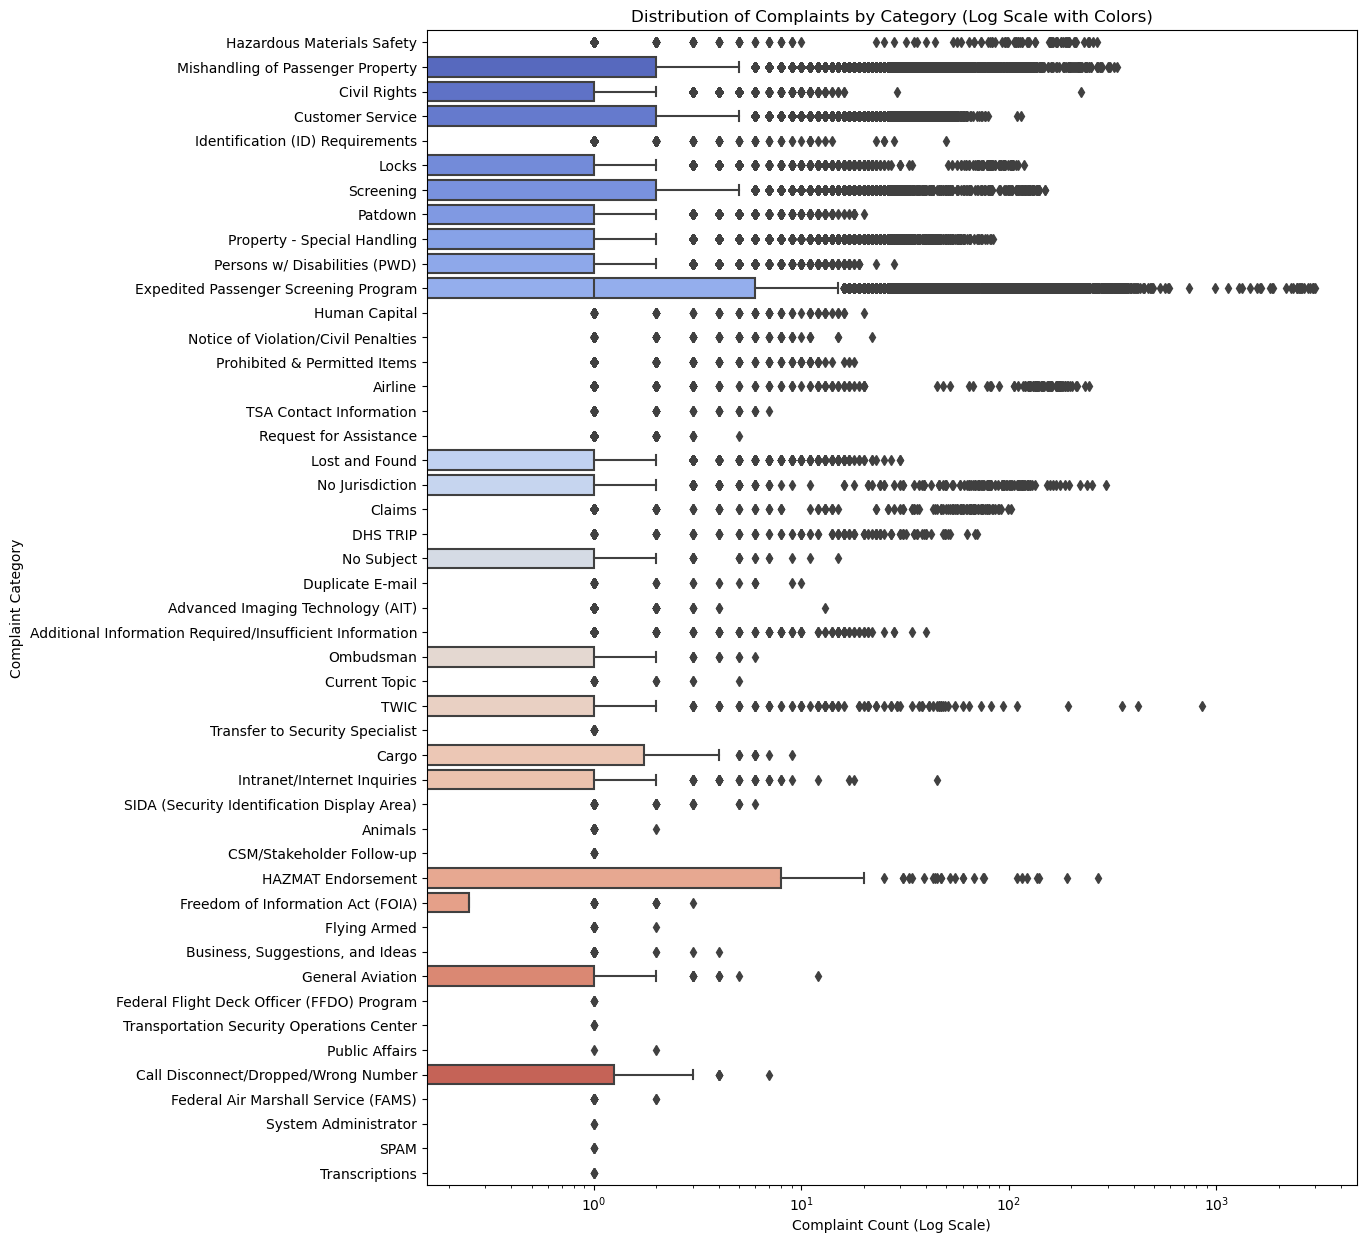

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out extreme outliers (e.g., complaint counts > 3000)
filtered_data = merged_complaints[merged_complaints['count'] <= 3000]

# Initialize the figure with Seaborn and set a color palette
plt.figure(figsize=(12, 15))
palette = sns.color_palette("coolwarm", len(filtered_data['clean_cat'].unique()))

# Create a box plot with a log scale on the x-axis and a color palette for different categories
sns.boxplot(data=filtered_data, y='clean_cat', x='count', orient='h', palette=palette)
plt.xscale('log')  # Use a log scale on the x-axis

# Set plot title and labels
plt.title("Distribution of Complaints by Category (Log Scale with Colors)")
plt.xlabel("Complaint Count (Log Scale)")
plt.ylabel("Complaint Category")

# Show the box plot
plt.show()

##### Analysis
Box Plot Distribution of Complaints by Category

1. Wide Boxes (High Variability): Categories such as "Expedited Passenger Screening Program" and "Mishandling of Passenger Property" have larger boxes and more outliers. This suggests high variability in complaint counts within these categories, which might indicate inconsistent experiences or operational challenges.

2. Narrow Boxes (Low Variability): Some categories, like "Advanced Imaging Technology" and "Freedom of Information Act," have narrow boxes, indicating more consistent complaint counts.

3. Outliers: Numerous outliers, especially for categories with high complaint counts, suggest occasional spikes in complaints that may be driven by specific events or operational issues at certain times.

## SUMMARY PAPER 

#### Audience, Purpose, and Medium
The primary audience for this analysis includes technical stakeholders such as TSA employees, operational managers, and policy-makers. These individuals are familiar with airport operations, complaints data, and would be interested in understanding patterns to drive improvements in passenger experience. Given the audience's data literacy, detailed visualizations such as heat maps and geographic distributions were chosen to convey insights effectively.

The purpose of this analysis is to identify key problem areas in TSA operations across various airports and complaint categories. By presenting clear, data-driven insights, the analysis encourages stakeholders to take actionable steps to enhance passenger experience by focusing on high-traffic airports and frequent complaint categories, such as expedited screening and property mishandling.

The medium for this presentation is using a combination of powerpoint and a Jupyter Notebook, which enables interactive data exploration and integrates multiple visualizations. This format is particularly suited for a technical audience that may want to dive into specific details of the data during or after the presentation.

#### Design Choices
Design choices were carefully crafted to make the analysis both effective and visually engaging. Red tones were strategically used to highlight areas of concern, particularly in geographic maps, where larger red markers indicate airports with higher complaint volumes. Consistent color schemes across charts provided a cohesive visual experience, aiding in the easy identification of trends.

Titles, labels, and concise descriptions were added to enhance readability. Technical terminology was used appropriately for this knowledgeable audience, while alignment and spacing ensured a professional layout without clutter. Chart elements were sized to emphasize major trends, such as larger markers for higher complaint volumes, allowing viewers to quickly identify significant problem areas.

#### Ethical Considerations
Ethical considerations were paramount throughout this analysis. Data privacy was rigorously maintained, as no personal or sensitive information was included. All data sources were publicly available, ensuring compliance with ethical standards. Data cleaning and merging were conducted with care to maintain data integrity, and no transformations were applied that could mislead the audience. Assumptions and data filtering were transparently documented, with no data categories or airports excluded without proper indication.

Visual scales and representations were crafted to accurately reflect data trends without exaggeration, ensuring that the audience received a truthful portrayal of the issues. Missing data or gaps were left as-is, avoiding misleading conclusions. Transparency was upheld throughout, with any limitations or assumptions openly addressed.

#### Call to Action
This analysis highlights recurring issues in specific complaint categories and at high-traffic airports, particularly those related to expedited passenger screening and property mishandling. The TSA is urged to allocate additional resources to these high-complaint airports and focus on process improvements in the top complaint categories to reduce passenger dissatisfaction. Implementing targeted improvements in screening efficiency, customer service, and property handling can significantly enhance the overall traveler experience. Taking action based on these insights could lead to a measurable reduction in complaint volumes and greater public confidence in TSA operations.

#### Conclusion
The analysis aims to drive improvements by pinpointing specific complaint categories and locations where TSA operations can be enhanced. Through targeted efforts, stakeholders can address frequent complaints, improve customer service, and optimize passenger screening processes. The insights provided should serve as a foundation for strategic discussions and operational changes across major U.S. airports.